# Import libraries

In [766]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV

import xgboost as xgb

---

# Load data
- 32 647 observations with 17 predictors and the response column booking_status

In [768]:
# Import data
train_path = "/Users/romanakm/Desktop/Homework 1/data-science-2-2024-hw1/2024_DS2_HW1_data_train.csv"
data_train = pd.read_csv(train_path, sep = ",", decimal = ".", index_col = "Booking_ID")
test_path = "/Users/romanakm/Desktop/Homework 1/data-science-2-2024-hw1/2024_DS2_HW1_data_test.csv"
data_test = pd.read_csv(test_path, sep = ",", decimal = ".", index_col = "Booking_ID")

### Basic characteristics of the train set

In [738]:
print(data_train.shape)
data_train.head()

(32647, 18)


no_of_adults  no_of_children  no_of_weekend_nights  \
Booking_ID                                                       
INN10204             NaN             NaN                   NaN   
INN20020             NaN             NaN                   NaN   
INN16435             1.0             NaN                   NaN   
INN07143             3.0             NaN                   NaN   
INN20511             1.0             0.0                   1.0   

            no_of_week_nights type_of_meal_plan  required_car_parking_space  \
Booking_ID                                                                    
INN10204                  2.0       Meal Plan 2                         NaN   
INN20020                  2.0       Meal Plan 1                         NaN   
INN16435                  2.0               NaN                         0.0   
INN07143                  3.0               NaN                         NaN   
INN20511                  1.0       Meal Plan 1                         0.0   

           room_type_reserved  lead_time  arrival_year  arrival_month  \
Booking_ID                                                              
INN10204          Room_Type 6        NaN        2018.0            9.0   
INN20020                  NaN        NaN           NaN           12.0   
INN16435          Room_Type 1        NaN        2018.0           11.0   
INN07143                  NaN      100.0        2018.0            5.0   
INN20511                  NaN        NaN        2018.0           11.0   

            arrival_date market_segment_type  repeated_guest  \
Booking_ID                                                     
INN10204             NaN              Online             0.0   
INN20020             NaN              Online             0.0   
INN16435             NaN                 NaN             0.0   
INN07143             NaN              Online             0.0   
INN20511             NaN                 NaN             0.0   

            no_of_previous_cancellations  \
Booking_ID                                 
INN10204                             0.0   
INN20020                             0.0   
INN16435                             0.0   
INN07143                             0.0   
INN20511                             0.0   

            no_of_previous_bookings_not_canceled  avg_price_per_room  \
Booking_ID                                                             
INN10204                                     NaN                 NaN   
INN20020                                     0.0                 NaN   
INN16435                                     NaN                 NaN   
INN07143                                     NaN                 NaN   
INN20511                                     0.0               150.0   

            no_of_special_requests  booking_status  
Booking_ID                                          
INN10204                       1.0             0.0  
INN20020                       NaN             0.0  
INN16435                       1.0             0.0  
INN07143                       2.0             0.0  
INN20511                       NaN             1.0

In [739]:
data_train.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  28231.000000     5043.000000           7729.000000       24287.000000   
mean       1.845312        0.103510              0.807737           2.204966   
std        0.516860        0.407673              0.873931           1.411324   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000        9.000000              7.000000          17.000000   

       required_car_parking_space    lead_time  arrival_year  arrival_month  \
count                17863.000000  6935.000000  29654.000000   31740.000000   
mean                     0.033645    86.213266   2017.820092       7.419817   
std                      0.180319    85.926525      0.384118       3.062828   
min                      0.000000     0.000000   2017.000000       1.000000   
25%                      0.000000    18.000000   2018.000000       5.000000   
50%                      0.000000    59.000000   2018.000000       8.000000   
75%                      0.000000   127.000000   2018.000000      10.000000   
max                      1.000000   443.000000   2018.000000      12.000000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count   5457.000000     7669.000000                  32578.000000   
mean      15.523731        0.026209                      0.023543   
std        8.726069        0.159768                      0.369300   
min        1.000000        0.000000                      0.000000   
25%        8.000000        0.000000                      0.000000   
50%       16.000000        0.000000                      0.000000   
75%       23.000000        0.000000                      0.000000   
max       31.000000        1.000000                     13.000000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                          18026.000000         9058.000000   
mean                               0.162155          103.601652   
std                                1.790668           35.382301   
min                                0.000000            0.000000   
25%                                0.000000           80.750000   
50%                                0.000000          100.000000   
75%                                0.000000          121.000000   
max                               58.000000          540.000000   

       no_of_special_requests  booking_status  
count            25197.000000    32295.000000  
mean                 0.622257        0.325778  
std                  0.784652        0.468672  
min                  0.000000        0.000000  
25%                  0.000000        0.000000  
50%                  0.000000        0.000000  
75%                  1.000000        1.000000  
max                  5.000000        1.000000

### Basic characteristics of the test set

In [740]:
print(data_test.shape)
data_test.head()

(3593, 17)


no_of_adults  no_of_children  no_of_weekend_nights  \
Booking_ID                                                       
INN04969             2.0             NaN                   1.0   
INN34541             2.0             0.0                   NaN   
INN36109             2.0             NaN                   NaN   
INN01554             2.0             NaN                   0.0   
INN24975             2.0             NaN                   NaN   

            no_of_week_nights type_of_meal_plan  required_car_parking_space  \
Booking_ID                                                                    
INN04969                  0.0       Meal Plan 1                         NaN   
INN34541                  2.0       Meal Plan 1                         0.0   
INN36109                  2.0       Meal Plan 1                         0.0   
INN01554                  3.0               NaN                         0.0   
INN24975                  NaN               NaN                         0.0   

           room_type_reserved  lead_time  arrival_year  arrival_month  \
Booking_ID                                                              
INN04969                  NaN        NaN        2017.0            8.0   
INN34541                  NaN        NaN        2018.0            2.0   
INN36109                  NaN        NaN        2018.0           12.0   
INN01554                  NaN        NaN        2018.0            6.0   
INN24975                  NaN        NaN        2018.0            9.0   

            arrival_date market_segment_type  repeated_guest  \
Booking_ID                                                     
INN04969            23.0                 NaN             NaN   
INN34541             NaN             Offline             NaN   
INN36109             NaN                 NaN             NaN   
INN01554            21.0              Online             NaN   
INN24975             NaN                 NaN             NaN   

            no_of_previous_cancellations  \
Booking_ID                                 
INN04969                             0.0   
INN34541                             0.0   
INN36109                             0.0   
INN01554                             0.0   
INN24975                             0.0   

            no_of_previous_bookings_not_canceled  avg_price_per_room  \
Booking_ID                                                             
INN04969                                     NaN                 NaN   
INN34541                                     0.0                 NaN   
INN36109                                     NaN                 NaN   
INN01554                                     0.0                 NaN   
INN24975                                     NaN                 NaN   

            no_of_special_requests  
Booking_ID                          
INN04969                       3.0  
INN34541                       NaN  
INN36109                       NaN  
INN01554                       0.0  
INN24975                       2.0

In [741]:
data_test.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count   3098.000000      502.000000            849.000000        2695.000000   
mean       1.849258        0.095618              0.822144           2.185529   
std        0.522841        0.382789              0.882310           1.420660   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000        3.000000              6.000000          15.000000   

       required_car_parking_space   lead_time  arrival_year  arrival_month  \
count                 1961.000000  745.000000   3246.000000    3499.000000   
mean                     0.022947   87.332886   2017.824399       7.462989   
std                      0.149774   92.004992      0.380539       3.147415   
min                      0.000000    0.000000   2017.000000       1.000000   
25%                      0.000000   15.000000   2018.000000       5.000000   
50%                      0.000000   54.000000   2018.000000       8.000000   
75%                      0.000000  134.000000   2018.000000      10.000000   
max                      1.000000  418.000000   2018.000000      12.000000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count    549.000000      840.000000                   3583.000000   
mean      15.867031        0.027381                      0.022049   
std        8.838710        0.163288                      0.365018   
min        1.000000        0.000000                      0.000000   
25%        8.000000        0.000000                      0.000000   
50%       16.000000        0.000000                      0.000000   
75%       24.000000        0.000000                      0.000000   
max       31.000000        1.000000                     11.000000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                           2010.000000         1062.000000   
mean                               0.156716          103.370659   
std                                1.829142           33.744863   
min                                0.000000            0.000000   
25%                                0.000000           80.000000   
50%                                0.000000           99.450000   
75%                                0.000000          120.000000   
max                               54.000000          278.000000   

       no_of_special_requests  
count             2767.000000  
mean                 0.629201  
std                  0.791669  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  1.000000  
max                  4.000000

### Define column masks

In [769]:
col_target = "booking_status"

# Take the prediction variables columns
cols_pred = list(data_train.columns)
cols_pred.remove(col_target)

# Divide into numerical and categorical columns
cols_pred_num = [col for col in cols_pred if data_train[col].dtype != 'O']
cols_pred_cat = [col for col in cols_pred if data_train[col].dtype == 'O']

print('Numerical predictors:')
print('---------------------')
print(data_train[cols_pred_num].dtypes)
print()
print('Categorical predictors:')
print('-----------------------')
print(data_train[cols_pred_cat].dtypes)
print()
# Show levels of categorical predictions
print(data_train.type_of_meal_plan.value_counts())
print()
print(data_train.room_type_reserved.value_counts())
print()
print(data_train.market_segment_type.value_counts())

Numerical predictors:
---------------------
no_of_adults                            float64
no_of_children                          float64
no_of_weekend_nights                    float64
no_of_week_nights                       float64
required_car_parking_space              float64
lead_time                               float64
arrival_year                            float64
arrival_month                           float64
arrival_date                            float64
repeated_guest                          float64
no_of_previous_cancellations            float64
no_of_previous_bookings_not_canceled    float64
avg_price_per_room                      float64
no_of_special_requests                  float64
dtype: object

Categorical predictors:
-----------------------
type_of_meal_plan      object
room_type_reserved     object
market_segment_type    object
dtype: object

type_of_meal_plan
Meal Plan 1     12767
Not Selected     2290
Meal Plan 2      1484
Meal Plan 3         3
Name: coun

### Plot the cancellation rate across predictors

In [743]:
def prob_of_cancellation_across_group(data, col_group, col_target, yright_lim = None):
    dt = data.copy()
    k = int(dt[col_group].nunique())
    
    if (k > 12) and dt[col_group].dtype != 'O':
        dt[col_group] = pd.qcut(dt[col_group], q=12, duplicates='drop')
    
    dt_grp = dt.groupby(col_group,dropna=False).agg(
        tot_cnt = (col_target, len),
        prob = (col_target, np.mean)
    )
    
    ax1 = plt.subplot(111)
    ax1.bar(range(len(dt_grp)), dt_grp['tot_cnt'])
    ax1.set_xticks(range(len(dt_grp)))
    ax1.set_xticklabels(dt_grp.index, rotation = 90)
    ax1.set_xlabel(col_group)
    ax1.set_ylabel('count', loc='top')
    ax1.spines['right'].set_color('gray')
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_color('gray')
    ax1.spines['bottom'].set_color('gray')
    ax1.tick_params(axis='y', colors='gray')
    ax1.tick_params(axis='x', colors='gray')    
    
    ax2 = ax1.twinx()
    ax2.plot(range(len(dt_grp)), dt_grp['prob'], marker ='o', color = 'red')
    ax2.set_ylabel(str(col_target), loc='top', color='red')
    if yright_lim is not None:
        ax2.set_ylim(yright_lim)
    ax2.spines['right'].set_color('gray')
    ax2.spines['top'].set_visible(False)
    ax2.spines['left'].set_color('gray')
    ax2.spines['bottom'].set_color('gray')
    ax2.tick_params(axis='y', colors='gray')
    ax2.tick_params(axis='x', colors='gray')
    
    plt.show()

The provided callable <function mean at 0x10c127ac0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.


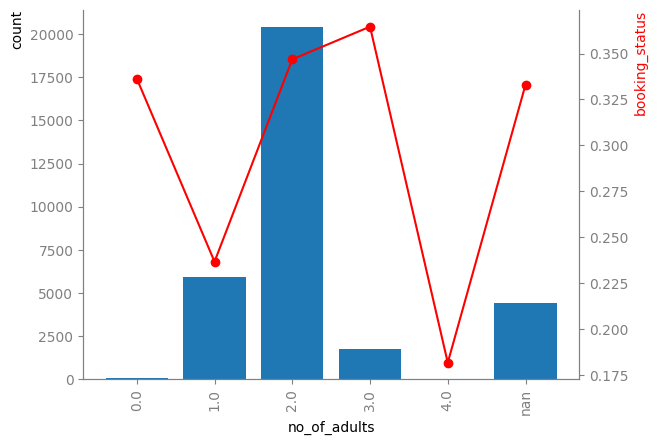

The provided callable <function mean at 0x10c127ac0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.


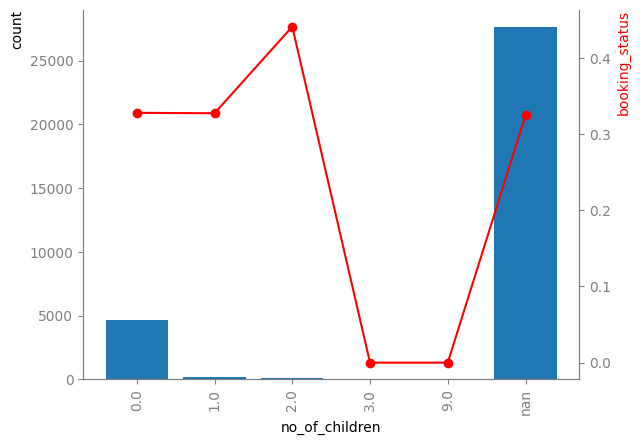

The provided callable <function mean at 0x10c127ac0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.


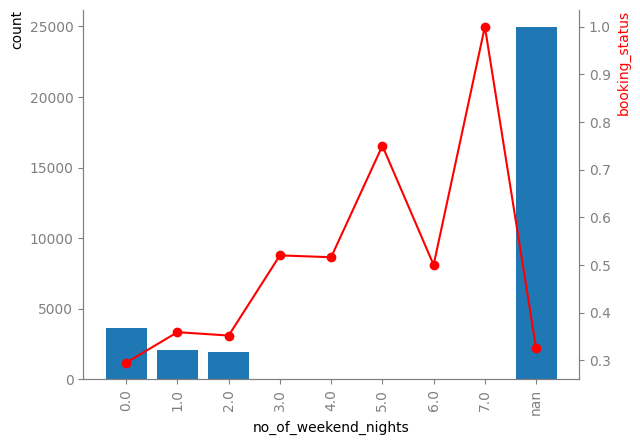

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
The provided callable <function mean at 0x10c127ac0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.


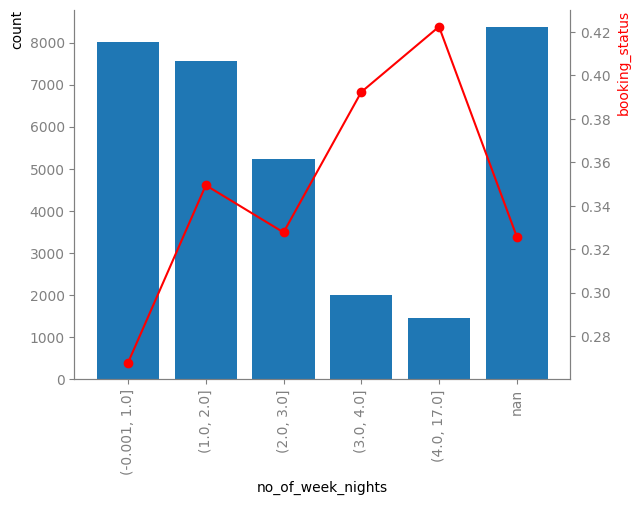

The provided callable <function mean at 0x10c127ac0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.


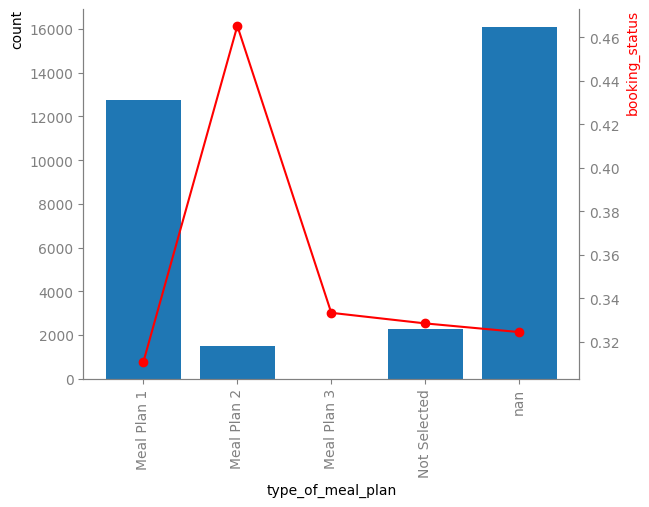

The provided callable <function mean at 0x10c127ac0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.


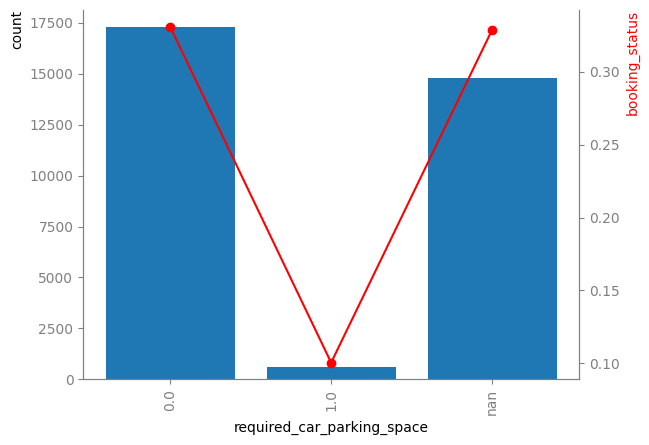

The provided callable <function mean at 0x10c127ac0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.


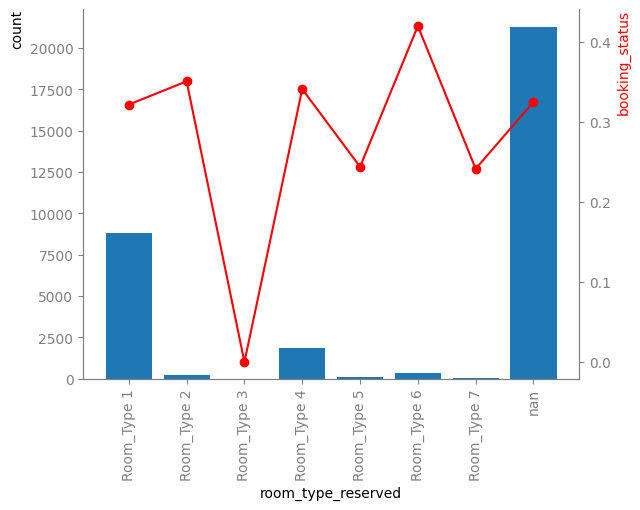

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
The provided callable <function mean at 0x10c127ac0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.


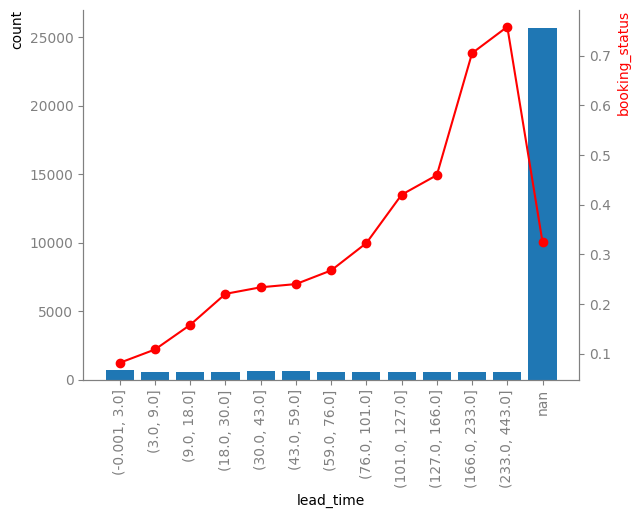

The provided callable <function mean at 0x10c127ac0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.


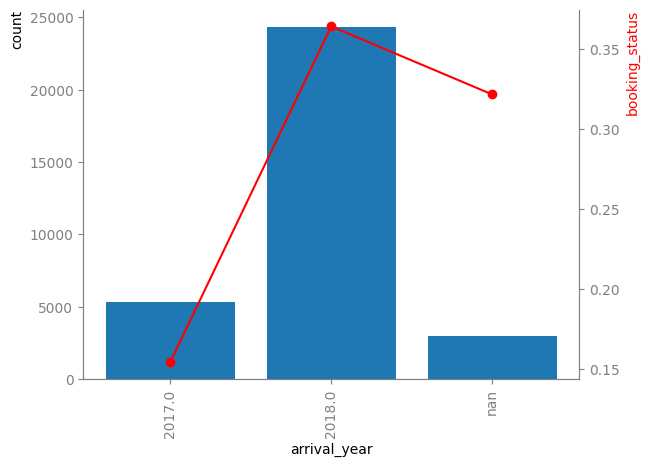

The provided callable <function mean at 0x10c127ac0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.


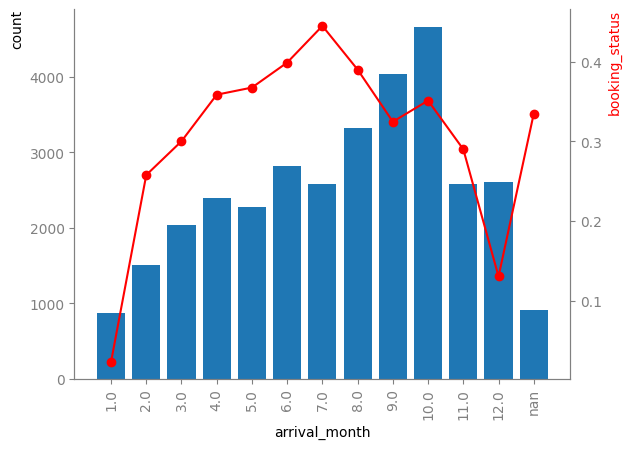

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
The provided callable <function mean at 0x10c127ac0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.


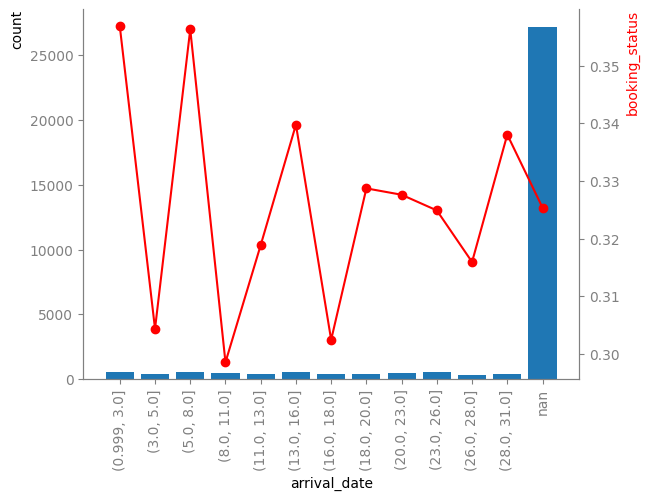

The provided callable <function mean at 0x10c127ac0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.


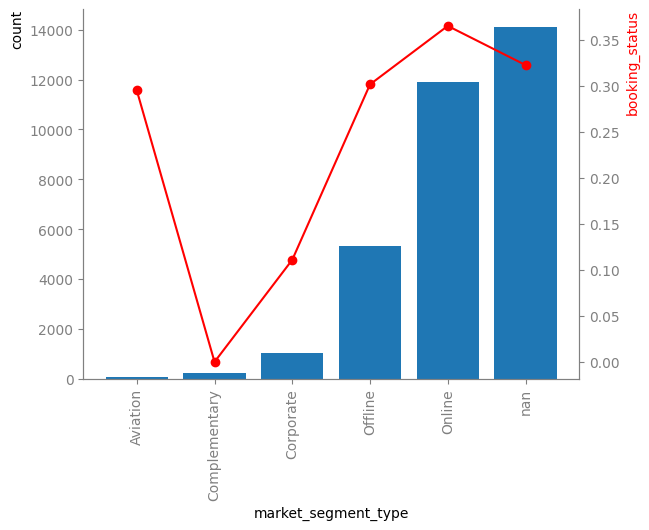

The provided callable <function mean at 0x10c127ac0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.


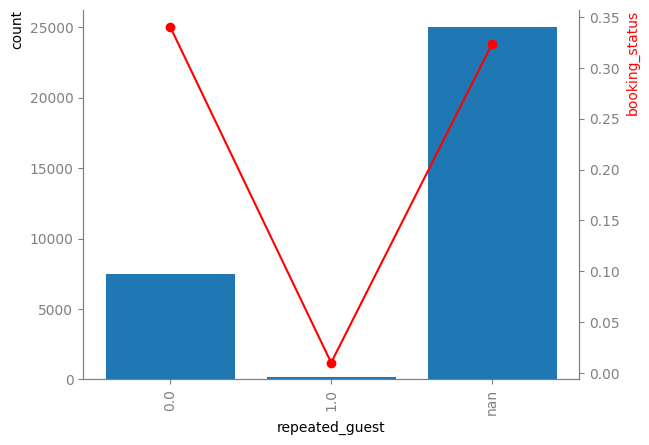

The provided callable <function mean at 0x10c127ac0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.


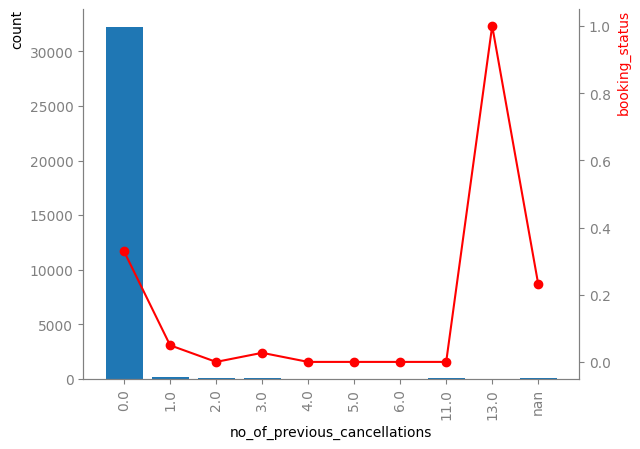

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
The provided callable <function mean at 0x10c127ac0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.


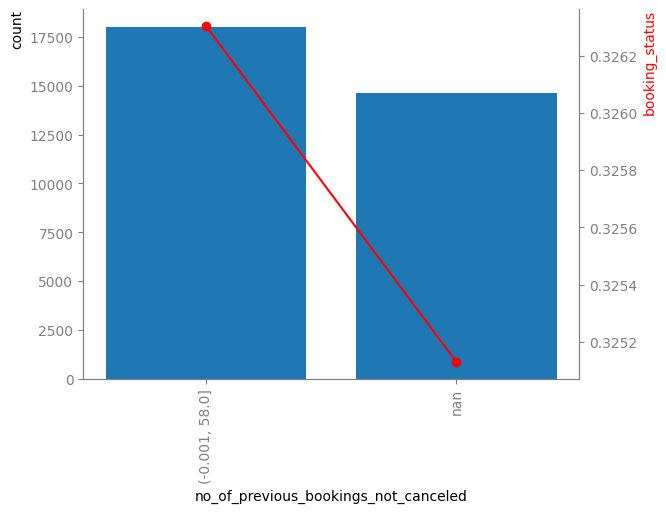

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
The provided callable <function mean at 0x10c127ac0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.


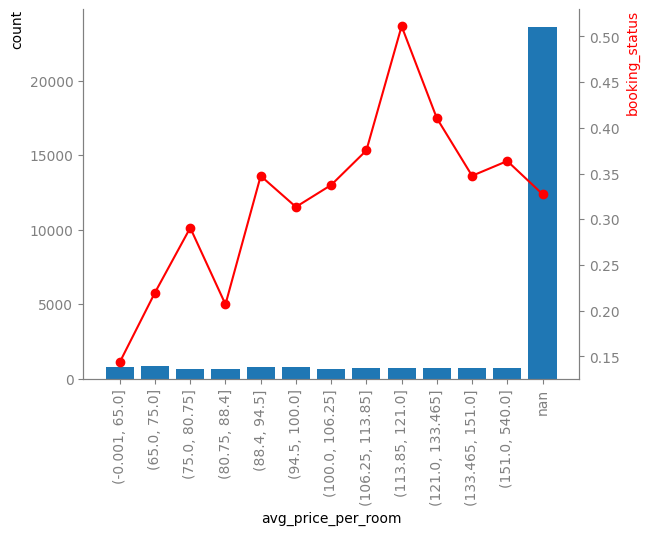

The provided callable <function mean at 0x10c127ac0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.


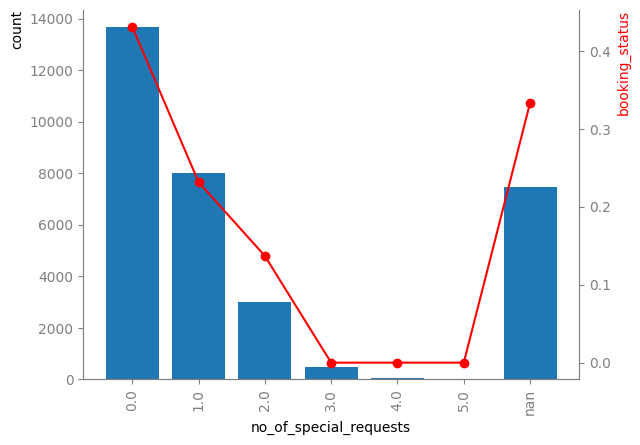

In [744]:
for col in (cols_pred):
    prob_of_cancellation_across_group(data_train, col , col_target, yright_lim = None)

***

# Data manipulation

### Handle missing values

In [770]:
# Check if there are missing values in the response variable
print(data_train.booking_status.value_counts(dropna=False))

booking_status
0.0    21774
1.0    10521
NaN      352
Name: count, dtype: int64


In [771]:
# Not many observations with missing values of response, remove them
data_train.dropna(subset = ["booking_status"], inplace = True)
print(data_train.shape)
print(data_train.booking_status.value_counts(dropna=False))

(32295, 18)
booking_status
0.0    21774
1.0    10521
Name: count, dtype: int64


In [772]:
# Percentages of missing values in predictors (train data)
data_train.isna().sum()/data_train.shape[0] * 100

no_of_adults                            13.574857
no_of_children                          84.554885
no_of_weekend_nights                    76.312123
no_of_week_nights                       25.626258
type_of_meal_plan                       49.326521
required_car_parking_space              45.273262
room_type_reserved                      65.183465
lead_time                               78.783093
arrival_year                             9.180988
arrival_month                            2.774423
arrival_date                            83.303917
market_segment_type                     43.229602
repeated_guest                          76.528874
no_of_previous_cancellations             0.213655
no_of_previous_bookings_not_canceled    44.790215
avg_price_per_room                      72.237188
no_of_special_requests                  22.799195
booking_status                           0.000000
dtype: float64

In [773]:
# Percentages of missing values in predictors (test data)
data_test.isna().sum()/data_test.shape[0] * 100

no_of_adults                            13.776788
no_of_children                          86.028389
no_of_weekend_nights                    76.370721
no_of_week_nights                       24.993042
type_of_meal_plan                       47.787364
required_car_parking_space              45.421653
room_type_reserved                      64.709157
lead_time                               79.265238
arrival_year                             9.657668
arrival_month                            2.616198
arrival_date                            84.720289
market_segment_type                     43.028110
repeated_guest                          76.621208
no_of_previous_cancellations             0.278319
no_of_previous_bookings_not_canceled    44.057890
avg_price_per_room                      70.442527
no_of_special_requests                  22.989146
dtype: float64

In [774]:
# Define missing as a new category for categorical predictors
for col in cols_pred_cat:
    data_train[col] = data_train[col].fillna("missing")
    data_test[col] = data_test[col].fillna("missing")

### Mean target encoding of categorical variables

In [775]:
# Convert categorical variables to mean target encoding
def mean_target_encoding(dt, predictor, target, alpha = 0.01):
    total_cnt = len(dt)
    total_dr = np.mean(dt[target])
    dt_grp = dt.groupby(predictor).agg(
        categ_dr = (target, 'mean'),
        categ_cnt = (target, len)
    )
    
    dt_grp['categ_freq'] = dt_grp['categ_cnt'] / total_cnt
    dt_grp['categ_encoding'] = (dt_grp['categ_freq'] * dt_grp['categ_dr'] + alpha * total_dr) / (dt_grp['categ_freq'] + alpha)
    
    return dt_grp[['categ_encoding']].to_dict()['categ_encoding']

In [777]:
for pred in cols_pred_cat:
    new_vals = mean_target_encoding(
            dt=data_train, 
            predictor=pred, 
            target="booking_status"
        )
    data_train['MTE_' + pred] = data_train[pred].map(new_vals)
    data_test['MTE_' + pred] = data_test[pred].map(new_vals)

    if 'MTE_' + pred not in cols_pred:
        cols_pred.append('MTE_' + pred)
        
    if pred in cols_pred:
        cols_pred.remove(pred)

### Define predictors and target

In [778]:
X = data_train[cols_pred]
TARGET = data_train["booking_status"]

---

# XGBoost

### Train the first classifier

In [779]:
X_train, X_test, y_train, y_test = train_test_split(X, TARGET, test_size=0.2, random_state=42, stratify=TARGET)

In [780]:
init_model = xgb.XGBClassifier(
    learning_rate = 0.1,
    max_depth = 6,
    min_child_weight = 1,
    n_estimators = 100,
    subsample = 1.0,
    colsample_bytree = 0.7
)

init_model.fit(
    X_train,
    y_train,
    verbose = True
)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Prediction accuracy

In [781]:
y_pred_prob = init_model.predict_proba(X_test)[:, 1]
y_pred = np.round(y_pred_prob)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 76.39%
              precision    recall  f1-score   support

         0.0       0.78      0.90      0.84      4355
         1.0       0.70      0.49      0.57      2104

    accuracy                           0.76      6459
   macro avg       0.74      0.69      0.70      6459
weighted avg       0.76      0.76      0.75      6459

[[3913  442]
 [1083 1021]]


In [782]:
scores = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, TARGET, test_size=0.2, random_state=i, stratify=TARGET)
    y_pred_prob = init_model.predict_proba(X_test)[:,1]
    scores.append(roc_auc_score(y_test, y_pred_prob))
np.mean(scores)

0.8347404795632835

### Predictor importance

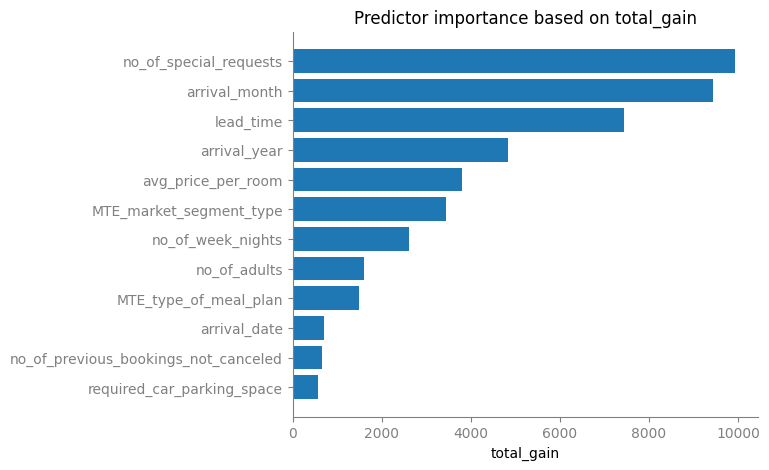

In [783]:
# Predictor importance based on 'total_gain'
importance_type = 'total_gain'
importance = init_model.get_booster().get_score(importance_type=importance_type)
predictor_strength = sorted([(k, v) for k, v in importance.items()], key=lambda x: x[1], reverse=True)
predictor_strength = pd.DataFrame(predictor_strength, columns=['predictor', 'strength'])

# Plot predictor importance
fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1)

n_strongest = 12
ax.barh(range(n_strongest, 0, -1), predictor_strength['strength'].iloc[:n_strongest])
ax.set_yticks(range(n_strongest, 0, -1))
ax.set_yticklabels(predictor_strength['predictor'].iloc[:n_strongest])
ax.set_xlabel(importance_type)
ax.set_title('Predictor importance based on total_gain')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.tick_params(axis='y', colors='gray')
ax.tick_params(axis='x', colors='gray')

plt.show()

In [784]:
# Keep the 12 strongest predictors
cols_pred = list(predictor_strength["predictor"].iloc[:n_strongest])

In [785]:
# Redefine train and test data
X = data_train[cols_pred]
TARGET = data_train["booking_status"]
X_train, X_test, y_train, y_test = train_test_split(X, TARGET, test_size=0.2, random_state=42, stratify=TARGET)

### Grid search with cross validation

In [812]:
# Extensive search - takes a loong time
param_grid = {
    'learning_rate': [0.1, 0.3],
    'n_estimators': [100, 200],
    'max_depth': [6, 9],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.01, 0.1],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [0, 0.5, 1],
}

model = xgb.XGBClassifier()

grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid, 
                           scoring='roc_auc', 
                           cv=5, 
                           verbose=2, 
                           n_jobs=-1)
grid_search.fit(X, TARGET)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 5 folds for each of 3888 candidates, totalling 19440 fits
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_chi

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=0.5, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=0

## Prediction accuracy

In [813]:
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
y_pred = np.round(y_pred_prob)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 82.98%
              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88      4355
         1.0       0.82      0.61      0.70      2104

    accuracy                           0.83      6459
   macro avg       0.83      0.77      0.79      6459
weighted avg       0.83      0.83      0.82      6459

[[4078  277]
 [ 822 1282]]


---

# Final model diagnostics

### SHAP

In [815]:
import shap
shap.initjs()

In [816]:
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(data_train[cols_pred])

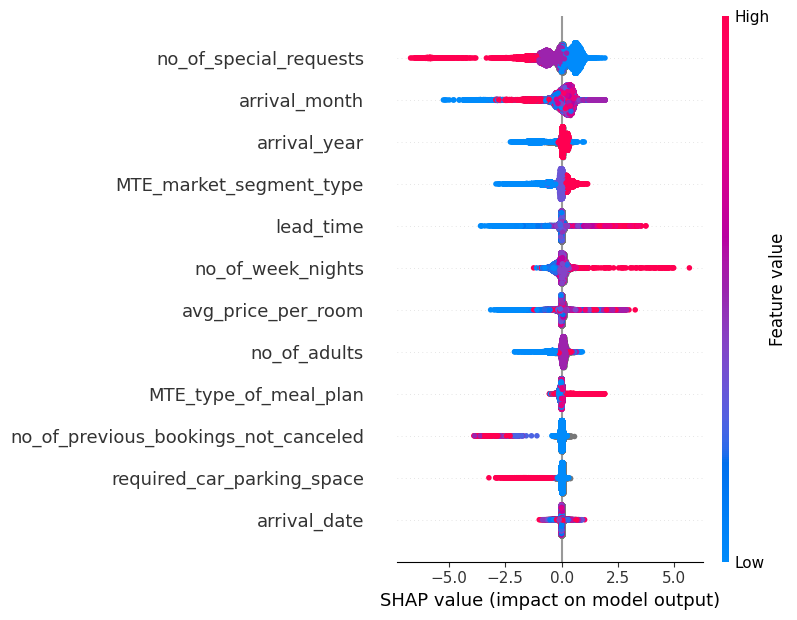

In [817]:
plt.figure()
shap.summary_plot(shap_values, data_train[cols_pred], max_display=20, show=True)
plt.show()

---

# Make predictions

In [818]:
X_test_data = data_test[cols_pred]
y_pred_prob_test = best_model.predict_proba(X_test_data)[:, 1]
y_pred_prob_test

array([0.00171989, 0.17905402, 0.14905572, ..., 0.9807639 , 0.00198585,
       0.11321475], dtype=float32)

## Prepare and export csv

In [819]:
# Prepare values for CSV
predictions = pd.DataFrame({
    'Booking_ID': data_test.index,
    'booking_status': y_pred_prob_test
})
print(predictions)
print(predictions.iloc[2,1].dtype)

     Booking_ID  booking_status
0      INN04969        0.001720
1      INN34541        0.179054
2      INN36109        0.149056
3      INN01554        0.786888
4      INN24975        0.200398
...         ...             ...
3588   INN29523        0.003496
3589   INN25061        0.372815
3590   INN08475        0.980764
3591   INN13558        0.001986
3592   INN00626        0.113215

[3593 rows x 2 columns]
float32


In [820]:
# Export CSV
predictions.to_csv("/Users/romanakm/Desktop/Homework 1/2024_DS2_HW1_predictions.csv", index=False)

print("Predictions saved to '2024_DS2_HW1_predictions.csv'")

Predictions saved to '2024_DS2_HW1_predictions.csv'
